In [1]:
%pylab inline
import numpy as np
import sklearn
from sklearn import datasets
from sklearn import cluster
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats

Populating the interactive namespace from numpy and matplotlib


<h1> zad 0 </h1>

In [2]:
def get_distance2(A, B):
    assert(len(A.shape) == len(B.shape) == 2)
    assert(A.shape[0] == B.shape[0])
    d = A.shape[0]
    N = A.shape[1]
    M = B.shape[1]
    
    return np.squeeze(np.sum((A.T.reshape(N, d, 1) - B.reshape((1, d, M)))**2, 1))
    
    
def kmeans(data, k, eps=None, max_iter=100, debug=False):
    assert(len(data.shape) == 2)
    N = data.shape[1]
    centers = data[:, np.random.choice(N, k, replace=False)]
    prev_err = np.infty
    err = None
    
    for i in xrange(max_iter):
        distances2 = get_distance2(centers, data)
        assig = distances2.argmin(axis=0)
        err = distances2[assig, np.arange(N)].sum()
        if eps is not None:
            if np.abs(err-prev_err) < eps:
                if debug:
                    print 'Breaking with prev_err = {} and err = {}'.format(prev_err, err)
                break
        prev_err = err
        
        if debug:
            print 'Error at iteration {}: {}'.format(i, err)
        for j in xrange(k):
            mask = assig==j
            mask_sum = mask.sum()
            if mask_sum != 0:
                centers[:, j] = data[:, mask].sum(axis=1) / mask.sum()
        
    return centers, assig, err
    
def get_ent(A, B):
    sum_ent = 0.
    uniq = np.unique(A)
    for i in uniq:
        mask = A==i
        t = B[mask]
        sum_ent += stats.entropy(np.bincount(t)/float(t.size))
    sum_ent /= uniq.size
    return sum_ent
        

In [23]:
iris = datasets.load_iris()

print 'Feature names: ', iris.feature_names
print 'Target names: ', iris.target_names
print 'Iris data size: {}x{}'.format(iris.data.shape[0], iris.data.shape[1])

Feature names:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names:  ['setosa' 'versicolor' 'virginica']
Iris data size: 150x4


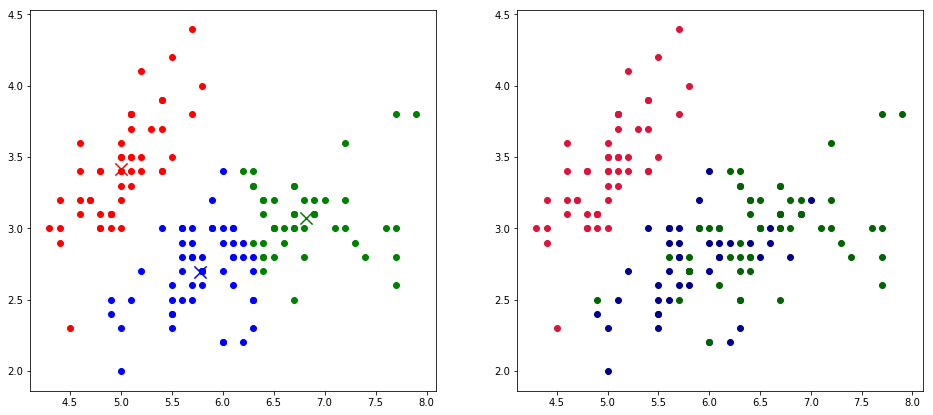

In [31]:
f, ax = subplots(1, 2, figsize=(16,7))
data = iris.data.T[[0,1], :]
X = data[0, :]
Y = data[1, :]
centers, assig, _ = kmeans(data, 3)

for i in xrange(3):
    mask = assig==i
    ax[0].scatter(X[mask], Y[mask], color='rgb'[i])
    ax[0].scatter(centers[0,i], centers[1,i], color='rgb'[i], marker='x', s=150)
    
colors = ['crimson', 'darkblue', 'darkgreen']
for target in set(iris.target):
    target_mask = iris.target==target
    ax[1].scatter(
        iris.data[target_mask,0], 
        iris.data[target_mask,1],
        color=colors[target], 
        marker='o'
    )
    

In [30]:
print get_ent(iris.target, assig)

0.583096372442


<h1>zad 1</h1>

In [6]:
def generate_data(N, mean, cov, p, d=2):
    chol = np.linalg.cholesky(cov)
    k = mean.shape[1]
    res = []
    for _ in xrange(N):
        i = np.random.choice(k, p=p)
        res.append(chol[i,:,:].dot(np.random.normal(size=(d,1))) + mean[:,i].reshape(d,-1))
    return np.squeeze(np.array(res)).T

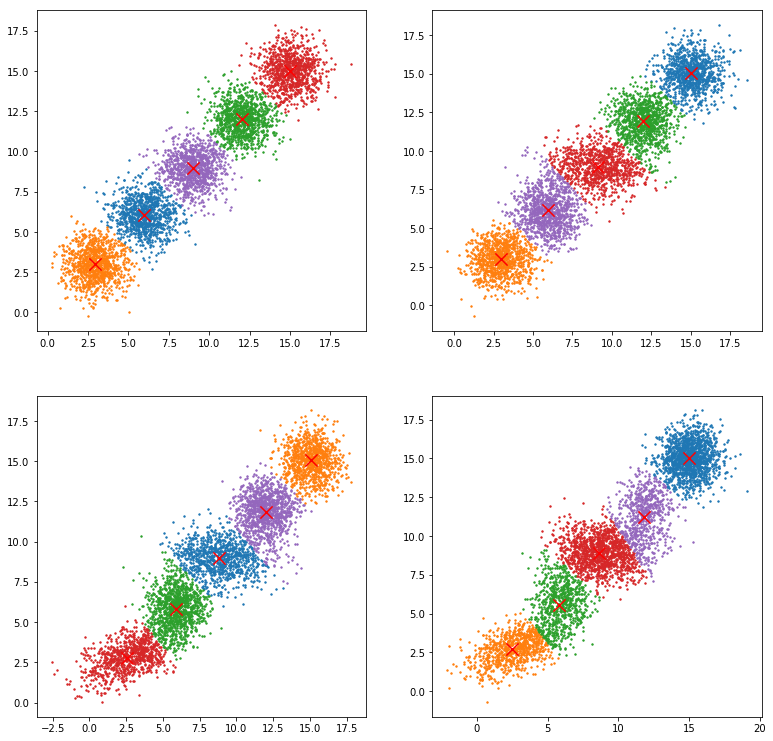

In [7]:
N = 5000
d = 2
K = 5
p = np.ones(K)/K
mean = np.ones((d,K)) * 3*(np.arange(K)+1)
I = np.eye(d)
cov = np.ones((K,d,d)) * I

f, ax = subplots(2,2, figsize=(13,13))


for i in xrange(4):
    if i == 1:
        cov[2,:,:] = np.array([[3., 0.], [0., 1.]])
    if i == 2:
        cov[0,:,:] = np.array([[3., 1.], [1., 1.]])
    if i == 3:
        p = np.array([0.2, 0.1, 0.3, 0.1, 0.3])
    data = generate_data(N, mean, cov, p)
    X = data[0,:]
    Y = data[1,:]
    centers, assig, _ = kmeans(data, K)
    i = np.unravel_index(i, (2,2))
    for j in xrange(K):
        mask = assig==j
        ax[i].scatter(X[mask], Y[mask], cmap='prism', s=2)
        ax[i].scatter(centers[0,j], centers[1,j], color='r', marker='x', s=150)

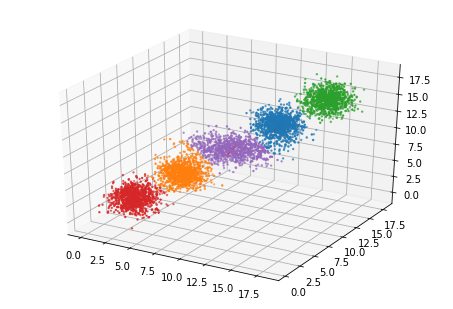

In [32]:
fig = figure()
ax = Axes3D(fig)

N = 5000
d = 3
K = 5
p = np.ones(K)/K
mean = np.ones((d,K)) * 3*(np.arange(K)+1)
I = np.eye(d)
cov = np.ones((K,d,d)) * I
cov[2, :, :] = np.array([[3., 1., 0.],
                         [1., 1., 0.],
                         [0., 0., 1.]])

data = generate_data(N, mean, cov, p, d)
X = data[0,:]
Y = data[1,:]
Z = data[2,:]
centers, assig, _ = kmeans(data, K)
for j in xrange(K):
    mask = assig==j
    ax.scatter(X[mask], Y[mask], Z[mask], cmap='prism', s=2)
    ax.scatter(centers[0,j], centers[1,j], centers[2,j], color='r', marker='x', s=150)


Error at iteration 0: 3961272.17753
Error at iteration 1: 1180165.96941
Error at iteration 2: 993235.500289
Error at iteration 3: 942935.760181
Error at iteration 4: 942080.938773
Error at iteration 5: 942055.526759
Error at iteration 6: 942037.377321
Error at iteration 7: 942017.320004
Error at iteration 8: 941995.959635
Error at iteration 9: 941972.710478
Error at iteration 10: 941958.521015
Error at iteration 11: 941944.050557
Error at iteration 12: 941935.427804
Error at iteration 13: 941928.659705
Error at iteration 14: 941922.597165
Error at iteration 15: 941916.563131
Error at iteration 16: 941913.129834
Error at iteration 17: 941908.524135
Error at iteration 18: 941906.524073
Error at iteration 19: 941904.015651
Breaking with prev_err = 941904.015651 and err = 941904.015651


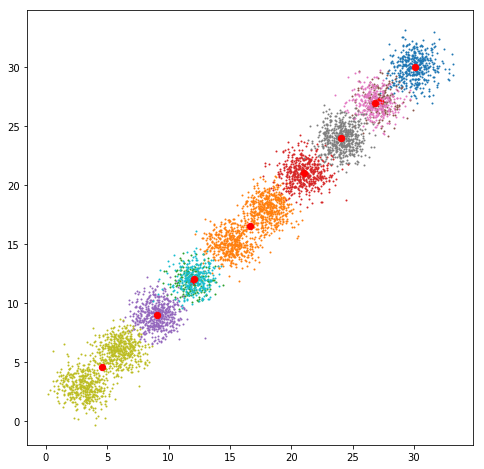

In [33]:
figure(figsize=(8, 8))
d = 100
K = 10
p = np.ones(K)/K
mean = np.ones((d,K)) * 3*(np.arange(K)+1)
I = np.eye(d)
cov = np.ones((K,d,d)) * I

data = generate_data(N, mean, cov, p, d)
centers, assig, err = kmeans(data, K, eps=1e-100, debug=True)

dim1, dim2 = np.random.randint(d, size=(2,))


for j in xrange(K):
    mask = assig==j
    scatter(data[dim1, mask], data[dim2, mask], cmap='prism', s=1)
    scatter(centers[dim1, j], centers[dim2, j], color='r', s=40)
    

    

<h1>zad 2</h1>

In [9]:
def generate_means(k, d, q=10.):
    return np.random.randint(2, size=(d,k)) * q
#     return np.array([np.array(map(int, list(bin(x)[2:].rjust(d, '0')))) for x in np.random.randint(2**32, size=(k, 12)]).T * q
    

In [13]:
# N = 1000000
# d = 1000
# K = 1000
# q = 10
# p = np.ones(K)/K
# mean = generate_means(N, d, q).astype('float64')
# I = np.eye(d)
# cov = np.ones((K,d,d)) * I

MemoryError: 

<h1>zad 3</h1>

In [43]:
wine = datasets.load_wine()
print 'Feature names: ', wine.feature_names
print 'Target names: ', wine.target_names
print 'Wine data size: {}x{}'.format(wine.data.shape[0], wine.data.shape[1])

Feature names:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target names:  ['class_0' 'class_1' 'class_2']
Wine data size: 178x13


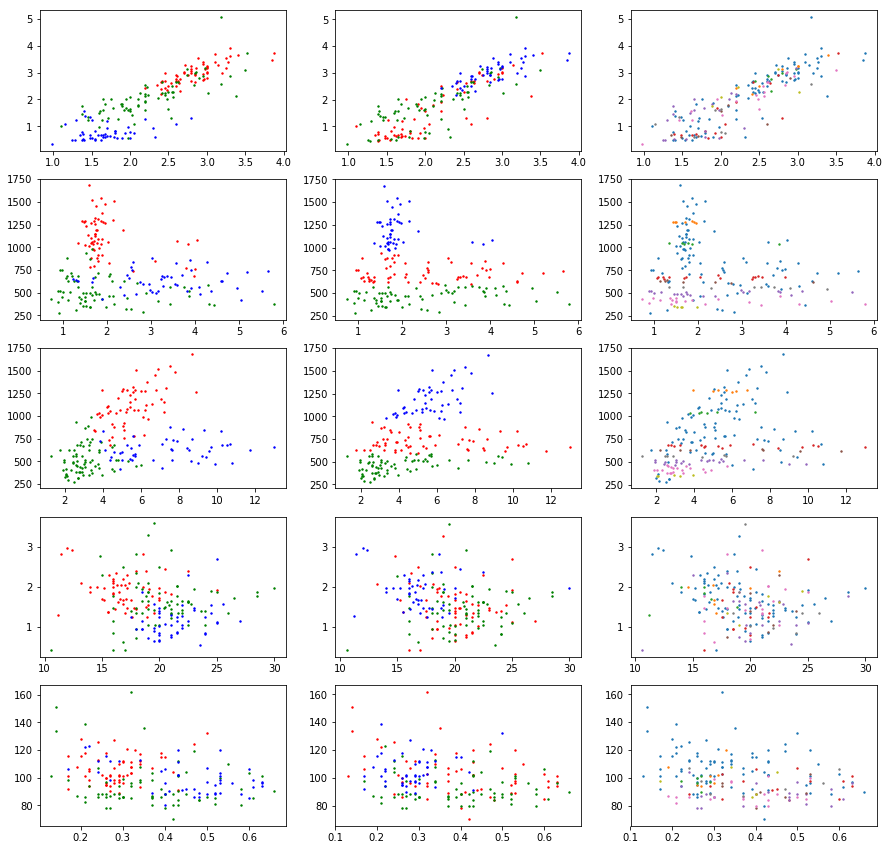

In [44]:
N, dim = wine.data.shape
targets = np.unique(wine.target)
f, ax = subplots(5,3, figsize=(15,15))

centers, assig, _ = kmeans(wine.data.T, targets.size)
db = cluster.DBSCAN(eps=15.0).fit(wine.data)
for i in xrange(5):
    d1, d2 = np.random.choice(dim, 2, replace=False)
    for j in np.unique(wine.target):
        mask = wine.target==j
        ax[i,0].scatter(
            wine.data[:,d1][mask],
            wine.data[:,d2][mask],
            color='rgb'[j],
            s=2,
        )
    for j in np.unique(assig):
        mask = assig==j
        ax[i,1].scatter(
            wine.data[:,d1][mask],
            wine.data[:,d2][mask],
            color='rgb'[j],
            s=2,
        )
    for j in np.unique(db.labels_):
        mask = db.labels_==j
        ax[i,2].scatter(
            wine.data[:,d1][mask],
            wine.data[:,d2][mask],
            cmap='prism',
            s=2,
        )
        

In [83]:
digits = datasets.load_digits()
# print 'Feature names: ', digits.feature_names
print 'Target names: ', digits.target_names
print 'Digits data size: {}x{}'.format(digits.data.shape[0], digits.data.shape[1])
print digits.DESCR

Target names:  [0 1 2 3 4 5 6 7 8 9]
Digits data size: 1797x64
Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block

In [47]:
targets = np.unique(digits.target)
K = targets.size

centers, assig, err = kmeans(digits.data.T, K)
print 'Error without PCA: {}'.format(err)

Error without PCA: 1221422.10638


In [48]:
pca = sklearn.decomposition.PCA(n_components=3)
pca.fit(digits.data.T)
print pca.components_.shape

(3, 1797)


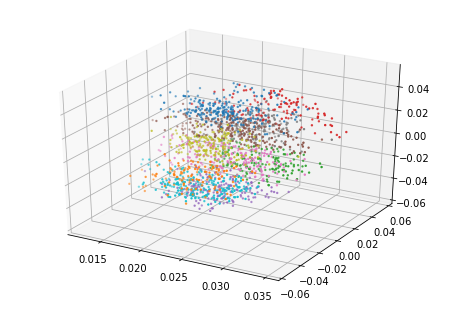

In [50]:
fig = figure()
ax = Axes3D(fig)

N, dim = digits.data.shape
targets = np.unique(digits.target)
K = targets.size

X = pca.components_[0]
Y = pca.components_[1]
Z = pca.components_[2]

centers, assig, err = kmeans(pca.components_, K)
for j in xrange(K):
    mask = assig==j
    ax.scatter(X[mask], Y[mask], Z[mask], cmap='prism', s=2)



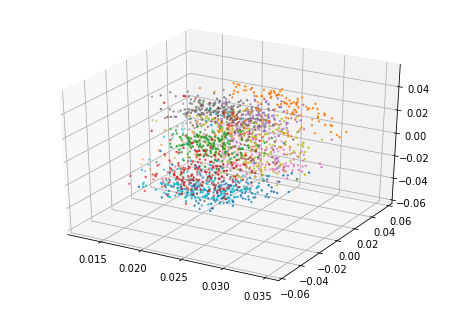

In [82]:
fig = figure()
ax = Axes3D(fig)

N, dim = digits.data.shape
targets = np.unique(digits.target)
K = targets.size

X = pca.components_[0]
Y = pca.components_[1]
Z = pca.components_[2]

for j in xrange(K):
    mask = digits.target==j
    ax.scatter(X[mask], Y[mask], Z[mask], cmap='prism', s=2)


In [93]:
print """
Name                                     Data Type    Measurement                       Description

Elevation                               quantitative    meters                       Elevation in meters
Aspect                                  quantitative    azimuth                      Aspect in degrees azimuth
Slope                                   quantitative    degrees                      Slope in degrees
Horizontal_Distance_To_Hydrology        quantitative    meters                       Horz Dist to nearest surface water features
Vertical_Distance_To_Hydrology          quantitative    meters                       Vert Dist to nearest surface water features
Horizontal_Distance_To_Roadways         quantitative    meters                       Horz Dist to nearest roadway
Hillshade_9am                           quantitative    0 to 255 index               Hillshade index at 9am, summer solstice
Hillshade_Noon                          quantitative    0 to 255 index               Hillshade index at noon, summer soltice
Hillshade_3pm                           quantitative    0 to 255 index               Hillshade index at 3pm, summer solstice
Horizontal_Distance_To_Fire_Points      quantitative    meters                       Horz Dist to nearest wildfire ignition points
Wilderness_Area (4 binary columns)      qualitative     0 (absence) or 1 (presence)  Wilderness area designation
Soil_Type (40 binary columns)           qualitative     0 (absence) or 1 (presence)  Soil Type designation
Cover_Type (7 types)                    integer         1 to 7                       Forest Cover Type designation
"""



Name                                     Data Type    Measurement                       Description

Elevation                               quantitative    meters                       Elevation in meters
Aspect                                  quantitative    azimuth                      Aspect in degrees azimuth
Slope                                   quantitative    degrees                      Slope in degrees
Horizontal_Distance_To_Hydrology        quantitative    meters                       Horz Dist to nearest surface water features
Vertical_Distance_To_Hydrology          quantitative    meters                       Vert Dist to nearest surface water features
Horizontal_Distance_To_Roadways         quantitative    meters                       Horz Dist to nearest roadway
Hillshade_9am                           quantitative    0 to 255 index               Hillshade index at 9am, summer solstice
Hillshade_Noon                          quantitative    0 to 255 index             

In [87]:
covtype = datasets.fetch_covtype()
print 'covtype data size: {}x{}'.format(covtype.data.shape[0], covtype.data.shape[1])
print covtype.DESCR

covtype data size: 581012x54
Forest covertype dataset.

A classic dataset for classification benchmarks, featuring categorical and
real-valued features.

The dataset page is available from UCI Machine Learning Repository

    http://archive.ics.uci.edu/ml/datasets/Covertype

Courtesy of Jock A. Blackard and Colorado State University.

[5 5 2 ..., 3 3 3]


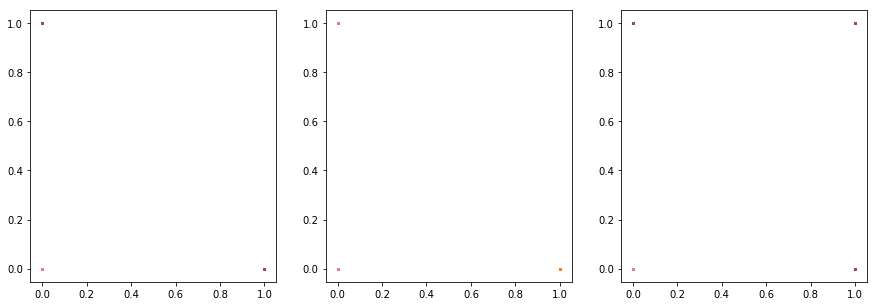

In [104]:
N, dim = covtype.data.shape
targets = np.unique(covtype.target)
f, ax = subplots(1, 3, figsize=(15,5))


# db = cluster.DBSCAN(eps=15.0).fit(wine.data)
for i in xrange(3):
    d1, d2 = np.random.choice(dim, 2, replace=False)
    for j in np.unique(covtype.target):
        mask = covtype.target==j
        ax[i].scatter(
            covtype.data[:,d1][mask],
            covtype.data[:,d2][mask],
            cmap='prism',
            s=2,
        )

In [107]:
centers, assig, err = kmeans(covtype.data.T, targets.size)


In [108]:
print 'Entropy: {}'.format(get_ent(covtype.target, assig))

Entropy: 1.11236056835


In [122]:
db = cluster.DBSCAN(eps=10.).fit(covtype.data)

In [125]:
print 'Entropy: {}'.format(get_ent(covtype.target, db.labels_+1))

Entropy: 0.000462154947162


In [127]:
mask = covtype.target==1
db.labels_[mask]

array([-1, -1, -1, ..., -1, -1, -1])

In [7]:
cancer = datasets.load_breast_cancer()
print 'Feature names: {}'.format(cancer.feature_names)
print cancer.DESCR

Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation i

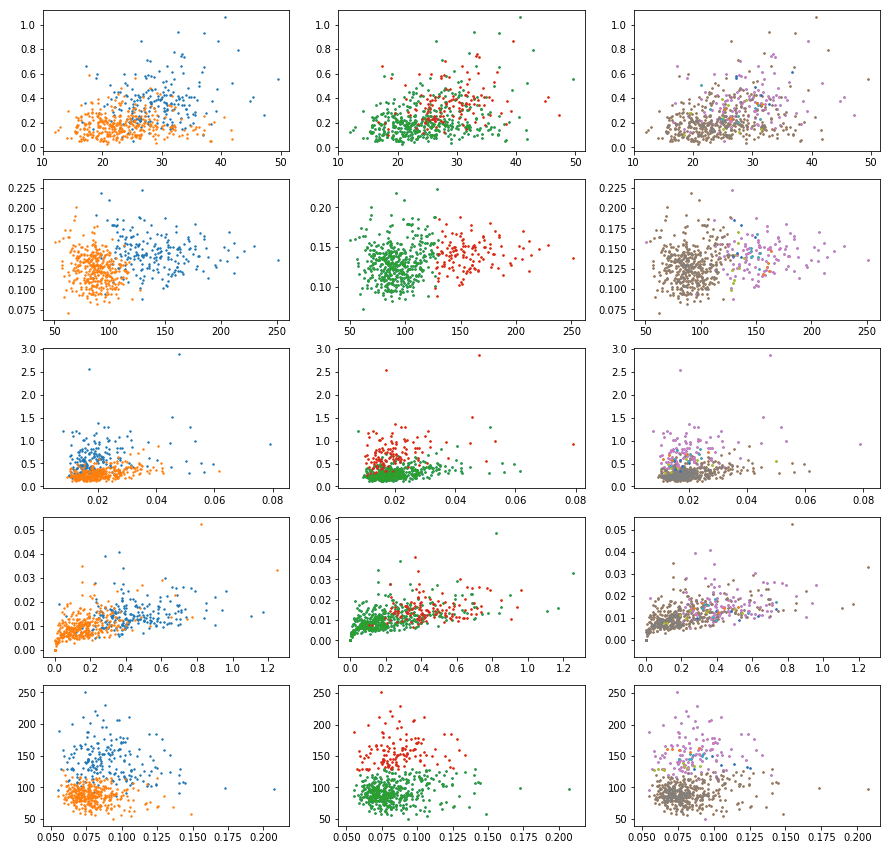

In [26]:
N, dim = cancer.data.shape
targets = np.unique(cancer.target)
f, ax = subplots(5,3, figsize=(15,15))

centers, assig, _ = kmeans(cancer.data.T, targets.size)
db = cluster.DBSCAN(eps=50.).fit(cancer.data)
for i in xrange(5):
    d1, d2 = np.random.choice(dim, 2, replace=False)
    for j in np.unique(cancer.target):
        mask = cancer.target==j
        ax[i,0].scatter(
            cancer.data[:,d1][mask],
            cancer.data[:,d2][mask],
            cmap='prism',
            s=2,
        )
        for j in np.unique(assig):
            mask = assig==j
            ax[i,1].scatter(
                cancer.data[:,d1][mask],
                cancer.data[:,d2][mask],
                cmap='prism',
                s=2,
            )
        for j in np.unique(db.labels_):
            mask = db.labels_==j
            ax[i,2].scatter(
                cancer.data[:,d1][mask],
                cancer.data[:,d2][mask],
                cmap='prism',
                s=2,
            )

In [22]:
print db.labels_

[-1 -1  6  0 -1  0  1  0  0  0  2  3 -1  0  0  0 -1  3 -1  0  0  0  0 -1 -1
 -1  0 -1  3  4 -1 -1 -1 -1  3  4  0  0 -1  0  0  0  1  0  0  1  0  0  0  0
  0  0  0 -1  0  0 -1  0  0  0  0  0  0  0 -1  0  0  0  0  0 -1  0 -1  0  0
  3  0 -1  6  0  0  0 -1 -1  0  1  0  1  0  0  0  0  0  0  0  5  0  0  0  0
  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0 -1  3  4  0  1 -1  0  0
  0  0 -1  0 -1  0  2  2  0  1  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  4  0  0  0  0 -1 -1  0 -1  0  0  4 -1  0  0 -1 -1  0  0
  0  0  0  0  0 -1 -1  3  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  4 -1 -1
  0  4 -1 -1  0  0  0  4  0  0  6  0 -1 -1  0  0  0  0 -1 -1  0  0  0 -1  0
  0  0  0  0  0  4  0  0 -1  0  0 -1  5  0 -1  0  0  0  0 -1  0  0  0  0  0
 -1  0 -1  4 -1  0 -1  0 -1  0  5  4  4  0 -1 -1  0  0  0  0  0  0 -1  0  4
  0  0 -1  0  0 -1  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 -1  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  6  0 -1  0
  0  0  0  2

<h1>zad 4</h1>

In [76]:
from PIL import Image

In [77]:
def get_compressed_img(img, color_num):
    bmap = np.asarray(img, dtype='float64')
    centers, assig, _ = kmeans(bmap.reshape(bmap.shape[0]*bmap.shape[1], 3).T, color_num, eps=10000.)
    res_img = Image.new(img.mode, img.size)
    res_img.putdata(map(tuple, list(centers[:, assig].T.astype('uint8'))))
    return res_img

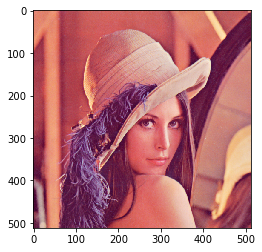

In [64]:
im = Image.open('./Lenna.png', 'r')
imshow(np.asarray(im))

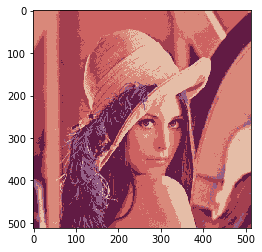

In [67]:
res_img = get_compressed_img(im, 6)
imshow(np.asarray(res_img))

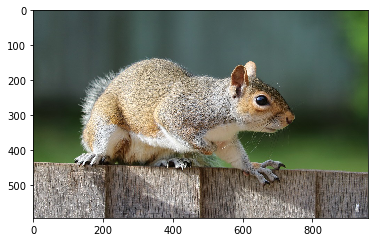

In [70]:
im = Image.open('./squirrel.jpg', 'r')
imshow(np.asarray(im))

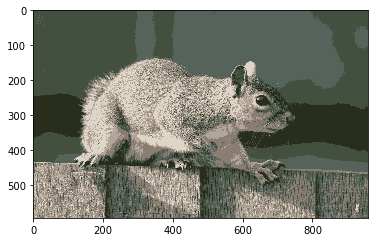

In [73]:
res_img = get_compressed_img(im, 6)
imshow(np.asarray(res_img))

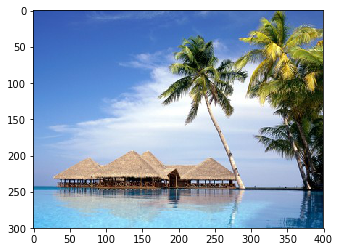

In [74]:
im = Image.open('./sea.jpg', 'r')
imshow(np.asarray(im))

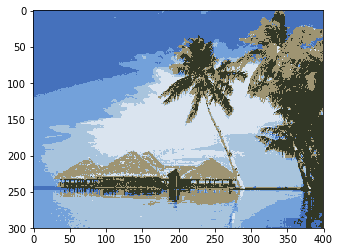

In [75]:
res_img = get_compressed_img(im, 6)
imshow(np.asarray(res_img))

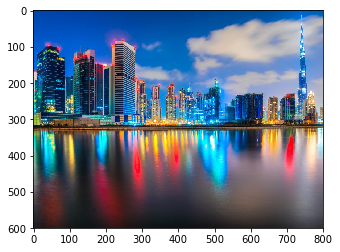

In [78]:
im = Image.open('./dubai.jpg', 'r')
imshow(np.asarray(im))

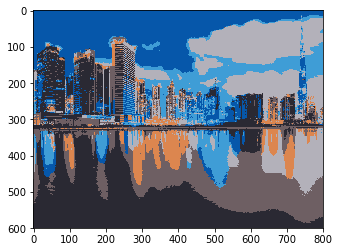

In [79]:
res_img = get_compressed_img(im, 6)
imshow(np.asarray(res_img))

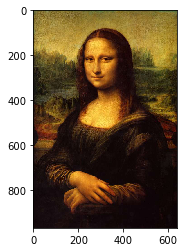

In [80]:
im = Image.open('./monalisa.jpg', 'r')
imshow(np.asarray(im))

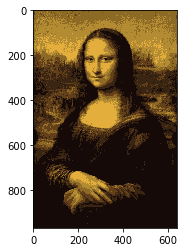

In [81]:
res_img = get_compressed_img(im, 6)
imshow(np.asarray(res_img))

<h1>zad 5</h1>

In [53]:
with open('./kosarak.dat', 'r') as f:
    data = f.read().strip()
    
kosarak_data = [map(int, line.split(' ')) for line in data.split('\n')]
kosarak_data_flat = np.array([item for sublist in kosarak_data for item in sublist])

In [54]:
T = 1000

bincnt = np.bincount(kosarak_data_flat)
ind = np.argpartition(bincnt, -T)[-T:]
count = bincnt[ind]
Z = ind[count.argsort()[::-1]]

In [61]:
items = np.unique(kosarak_data_flat)
N = items.shape[0]
P = np.zeros((T,N))
for i in kosarak_data:
    for j in items:
        if j not in i:
            continue
        for kidx, k in enumerate(Z):
            if k not in i:
                continue
            P[kidx, j] += 1.

KeyboardInterrupt: 